In [1]:
# Import all the basic required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

# Data Collection & Pre-processing

In [2]:
# Loading the csv file in Dataframe

df = pd.read_csv('cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Exploratory Data Analysis (EDA)

In [3]:
# Display the concise summary of a dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                567 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           557 non-null    float64
 9   concave points_mean      557 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
# Check the missing values

df.isnull().sum()

id                          0
diagnosis                   2
radius_mean                 0
texture_mean                0
perimeter_mean              0
area_mean                   0
smoothness_mean             0
compactness_mean            0
concavity_mean             12
concave points_mean        12
symmetry_mean               0
fractal_dimension_mean      0
radius_se                   0
texture_se                  0
perimeter_se                0
area_se                     0
smoothness_se               0
compactness_se              0
concavity_se               12
concave points_se          12
symmetry_se                 0
fractal_dimension_se        0
radius_worst                0
texture_worst               0
perimeter_worst             0
area_worst                  0
smoothness_worst            0
compactness_worst           0
concavity_worst            12
concave points_worst       12
symmetry_worst              0
fractal_dimension_worst     0
dtype: int64

In [5]:
# Fill missing values in the columns with the mean function

df['concavity_mean'] = df['concavity_mean'].fillna(df['concavity_mean'].mean())
df['concave points_mean'] = df['concave points_mean'].fillna(df['concave points_mean'].mean())
df['concavity_se'] = df['concavity_se'].fillna(df['concavity_se'].mean())
df['concave points_se'] = df['concave points_se'].fillna(df['concave points_se'].mean())
df['concavity_worst'] = df['concavity_worst'].fillna(df['concavity_worst'].mean())
df['concave points_worst'] = df['concave points_worst'].fillna(df['concave points_worst'].mean())

In [6]:
# Fill missing values in the 'Diagnosis' column with mode function

df['diagnosis'] = df['diagnosis'].fillna(df['diagnosis'].mode()[0])

In [7]:
# Check again the missing values

df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [8]:
# Check the diagnosis column unique value

df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [9]:
# check the duplicate values

df.duplicated().sum()

4

In [10]:
# Remove duplicate values

df.drop_duplicates(inplace = True)

In [11]:
# check the shape of a dataframe

df.shape

(565, 32)

In [12]:
# Remove unwanted columns

df.drop('id', axis = 1, inplace = True)

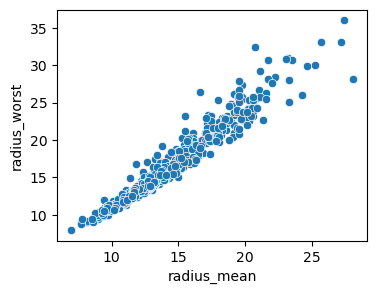

In [13]:
# Create a scatterplot chart to see the relationship between Features.

plt.figure(figsize = (4,3))
sns.scatterplot(data = df, x = 'radius_mean', y = 'radius_worst')
plt.show()

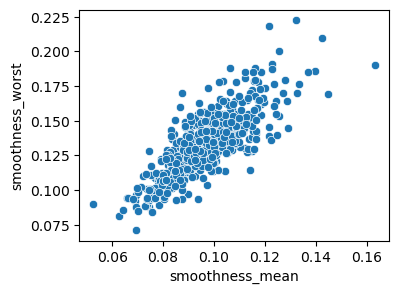

In [14]:
# Create a scatterplot chart to see the relationship between Features.

plt.figure(figsize = (4,3))
sns.scatterplot(data = df, x = 'smoothness_mean', y = 'smoothness_worst')
plt.show()

In [15]:
# Transform categorical data into numerical values using LabelEncoder()

le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [16]:
# Check the correlation of features

df.corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.721408,0.420328,0.732797,0.700926,0.344280,0.579910,0.675007,0.757181,0.315177,...,0.765532,0.458164,0.771462,0.723085,0.408395,0.582062,0.641587,0.779646,0.397619,0.318074
radius_mean,0.721408,1.000000,0.331660,0.997854,0.987351,0.168033,0.505875,0.651425,0.798361,0.146807,...,0.969749,0.303475,0.965237,0.941103,0.117100,0.412464,0.495530,0.716083,0.162201,0.004761
texture_mean,0.420328,0.331660,1.000000,0.337679,0.328462,-0.016147,0.245402,0.319016,0.312343,0.082193,...,0.360080,0.911518,0.365949,0.350452,0.085574,0.286365,0.320933,0.323827,0.114244,0.126037
perimeter_mean,0.732797,0.997854,0.337679,1.000000,0.986513,0.204730,0.556716,0.691143,0.827063,0.182099,...,0.969699,0.309786,0.970508,0.941594,0.148024,0.454762,0.532974,0.743716,0.187330,0.048710
area_mean,0.700926,0.987351,0.328462,0.986513,1.000000,0.175162,0.498506,0.667766,0.807101,0.150717,...,0.963035,0.293583,0.959290,0.959322,0.121642,0.389560,0.489179,0.704398,0.141982,0.001948
smoothness_mean,0.344280,0.168033,-0.016147,0.204730,0.175162,1.000000,0.656972,0.510546,0.541681,0.555752,...,0.210239,0.042479,0.236165,0.204511,0.803732,0.469638,0.420506,0.488476,0.391266,0.494785
compactness_mean,0.579910,0.505875,0.245402,0.556716,0.498506,0.656972,1.000000,0.869816,0.816403,0.601057,...,0.535292,0.256406,0.590326,0.509719,0.563442,0.865235,0.801718,0.802920,0.508849,0.685522
concavity_mean,0.675007,0.651425,0.319016,0.691143,0.667766,0.510546,0.869816,1.000000,0.918936,0.509080,...,0.666684,0.307738,0.708022,0.660913,0.434767,0.737138,0.880283,0.859792,0.404882,0.512219
concave points_mean,0.757181,0.798361,0.312343,0.827063,0.807101,0.541681,0.816403,0.918936,1.000000,0.471432,...,0.810063,0.301406,0.835509,0.796633,0.436757,0.646750,0.742034,0.908220,0.370159,0.362266
symmetry_mean,0.315177,0.146807,0.082193,0.182099,0.150717,0.555752,0.601057,0.509080,0.471432,1.000000,...,0.184502,0.101306,0.218082,0.176564,0.422213,0.470752,0.442872,0.444875,0.697798,0.433765


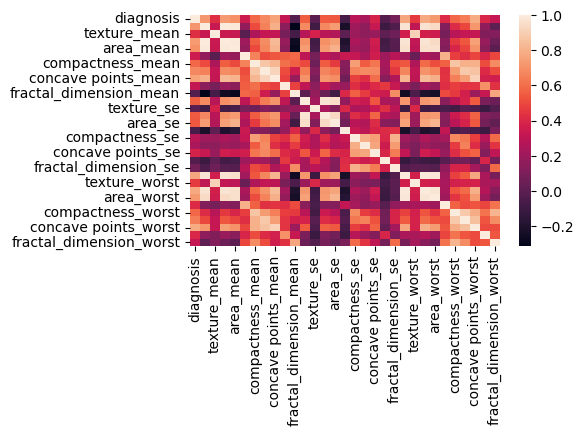

In [17]:
# Check the correlation of features using heatmap

plt.figure(figsize = (5,3))
sns.heatmap(df.corr())
plt.show()

In [18]:
# Checking the distribution of Target Vairable

df['diagnosis'].value_counts()

diagnosis
0    357
1    208
Name: count, dtype: int64

# Seperate the Features and Target variable

In [19]:
# Seperate the features and target

X = df.drop('diagnosis', axis = 1)
y = df['diagnosis']

In [20]:
# Check the data of X

X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [21]:
# Check the data of y

y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int32

# Train Test Split

In [22]:
# Splitting the data into Training and Testing data.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [23]:
# Checking the shape of X_train, y_test

print(X.shape, X_train.shape, X_test.shape)

(565, 30) (395, 30) (170, 30)


In [24]:
# Scaling the data using StandardScaler()

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [25]:
X_train

array([[-2.03837982e-01, -1.07119387e-01, -1.99392534e-01, ...,
         3.99811269e-01,  1.03497456e+00,  1.77363319e-01],
       [ 2.55361822e+00,  1.48958678e-01,  2.49878695e+00, ...,
         1.73577223e+00,  1.47979122e-03, -6.37721199e-01],
       [-1.48091531e+00, -1.13854493e+00, -1.49632137e+00, ...,
        -1.65616402e+00,  1.42102849e-01, -3.28247467e-01],
       ...,
       [-1.06482312e-01, -8.08962973e-01, -7.46236408e-02, ...,
         3.29581541e-01, -5.38987143e-01,  1.13749530e+00],
       [ 2.58797905e+00,  1.84191922e+00,  2.55720716e+00, ...,
         2.26089906e+00,  3.31859265e-01,  1.84410159e-01],
       [ 2.34262536e-01,  1.42223572e+00,  1.38610154e-01, ...,
        -1.41514836e+00, -2.27390294e+00, -1.67889184e+00]])

In [26]:
X_test

array([[-0.60757768, -1.08400978, -0.59164257, ..., -0.83272046,
        -0.27129506, -0.03639083],
       [-0.0835751 , -0.72123252, -0.16058482, ..., -1.15370224,
        -0.61861707, -1.02177399],
       [ 1.07610275,  1.25151701,  0.95899692, ..., -0.06466261,
        -0.68299871, -0.24368538],
       ...,
       [ 0.5979146 ,  0.63503278,  0.63768573, ..., -0.2067182 ,
        -0.28993185, -0.2407492 ],
       [-1.59029727, -1.75740025, -1.58061339, ..., -1.17253658,
         0.53008695,  0.38935576],
       [-0.54458283,  2.55324718, -0.61751438, ..., -0.01201092,
        -0.84395281, -0.95130559]])

# Model Training

In [27]:
# Creating user defined function for training and testing the model.

def myfunc(model):

    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Predict the labels for the test data
    y_pred = model.predict(X_test)

    # Print the confusion matrix to evaluate the performance of the classification model
    print(confusion_matrix(y_test, y_pred))

    # Print the classification report for detailed performance metrics such as precision, recall, and F1-score
    print(classification_report(y_test, y_pred))

    # Return the trained model
    return model

# Logistic Regression

In [28]:
# Initialize a LogisticRegression model
logr = LogisticRegression()

# Apply the custom function 'myfunc' to LogisticRegression model
logr = myfunc(logr)

[[112   3]
 [  3  52]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       115
           1       0.95      0.95      0.95        55

    accuracy                           0.96       170
   macro avg       0.96      0.96      0.96       170
weighted avg       0.96      0.96      0.96       170



# Decision Tree Classifier

In [29]:
# Initialize a DecisionTreeClassifier model
dtc = DecisionTreeClassifier(random_state = 1) # By default it will consider gini index.

# Apply the custom function 'myfunc' to DecisionTreeClassifier model
dtc = myfunc(dtc)

[[107   8]
 [  8  47]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       115
           1       0.85      0.85      0.85        55

    accuracy                           0.91       170
   macro avg       0.89      0.89      0.89       170
weighted avg       0.91      0.91      0.91       170



In [30]:
# Creating a dataframe to check the feature importances.

dict = {'Input columns': X.columns, 'Information Gain': dtc.feature_importances_}
dict = pd.DataFrame(dict)
dict.sort_values(by='Information Gain', ascending=False, ignore_index = True)

,Input columns,Information Gain
0,radius_worst,0.677701
1,concave points_worst,0.139103
2,texture_worst,0.084301
3,smoothness_worst,0.018801
4,symmetry_mean,0.012458
5,perimeter_se,0.010337
6,symmetry_se,0.010112
7,perimeter_worst,0.009957
8,area_worst,0.009162
9,smoothness_se,0.009101


# Decision Tree Classifier(Gini Index): max_depth hyperparameter

In [31]:
'''
# Iterate over a range of max_depth values from 1 to 8
for i in range(1,9):

    # initialize a DecisionTreeClassifier with max_depth hyper-parameter
    dtc1 = DecisionTreeClassifier(random_state = 1, max_depth = i)
    
    print('\n Max_depth:', i) # Print the max depth

    # Apply the custom function 'myfunc' to DecisionTreeClassifier model
    dtc1 = myfunc(dtc1)
'''

dtc1 = DecisionTreeClassifier(random_state=1, max_depth=5)
dtc1 = myfunc(dtc1)

[[110   5]
 [  6  49]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       115
           1       0.91      0.89      0.90        55

    accuracy                           0.94       170
   macro avg       0.93      0.92      0.93       170
weighted avg       0.94      0.94      0.94       170



In [32]:
# Creating a dataframe to check the feature importances.

dict = {'Input columns': X.columns, 'Information Gain': dtc1.feature_importances_}
dict = pd.DataFrame(dict)
dict.sort_values(by='Information Gain', ascending=False, ignore_index = True)

,Input columns,Information Gain
0,radius_worst,0.710343
1,concave points_worst,0.145802
2,texture_worst,0.077232
3,perimeter_se,0.010835
4,fractal_dimension_mean,0.010761
5,smoothness_worst,0.010599
6,fractal_dimension_worst,0.009585
7,concave points_mean,0.008946
8,smoothness_mean,0.008946
9,area_se,0.003479


# Decision Tree Classifier(Gini Index): min_samples_leaf hyperparameter

In [33]:
'''
# Iterate over a range of min_samples_leaf values from 45 to 100
for i in range(45,101):

    # initialize a DecisionTreeClassifier with min_samples_leaf hyper-parameter
    dtc2 = DecisionTreeClassifier(random_state = 1, min_samples_leaf = i)
    
    print('\n Min Samples Leaf:', i) # Print the min samples leaf

    # Apply the custom function 'myfunc' to DecisionTreeClassifier model
    dtc2 = myfunc(dtc2)
'''

dtc2 = DecisionTreeClassifier(random_state = 1, min_samples_leaf = 45)
dtc2 = myfunc(dtc2)

[[112   3]
 [ 10  45]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.95       115
           1       0.94      0.82      0.87        55

    accuracy                           0.92       170
   macro avg       0.93      0.90      0.91       170
weighted avg       0.92      0.92      0.92       170



In [34]:
# Creating a dataframe to check the feature importances.

dict = {'Input columns': X.columns, 'Information Gain': dtc2.feature_importances_}
dict = pd.DataFrame(dict)
dict.sort_values(by='Information Gain', ascending=False, ignore_index = True)

,Input columns,Information Gain
0,radius_worst,0.906244
1,concave points_mean,0.074818
2,texture_mean,0.018543
3,compactness_se,0.000231
4,fractal_dimension_se,0.000165
5,concavity_se,0.000000
6,symmetry_worst,0.000000
7,concave points_worst,0.000000
8,concavity_worst,0.000000
9,compactness_worst,0.000000


# Decision Tree Classifier(Entropy): max_depth hyperparameter

In [35]:
'''
# Iterate over a range of max_depth values from 1 to 8
for i in range(1,9):

    # initialize a DecisionTreeClassifier with max_depth hyper-parameter
    dtc3 = DecisionTreeClassifier(random_state = 1, criterion = 'entropy', max_depth = i)
    
    print('\n Max_depth:', i) # Print the max depth

    # Apply the custom function 'myfunc' to DecisionTreeClassifier model
    dtc3 = myfunc(dtc3)
'''

dtc3 = DecisionTreeClassifier(random_state = 1, criterion = 'entropy', max_depth = 4)
dtc3 = myfunc(dtc3)

[[109   6]
 [  3  52]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       115
           1       0.90      0.95      0.92        55

    accuracy                           0.95       170
   macro avg       0.93      0.95      0.94       170
weighted avg       0.95      0.95      0.95       170



In [36]:
# Creating a dataframe to check the feature importances.

dict = {'Input columns': X.columns, 'Information Gain': dtc3.feature_importances_}
dict = pd.DataFrame(dict)
dict.sort_values(by='Information Gain', ascending=False, ignore_index = True)

,Input columns,Information Gain
0,perimeter_worst,0.629446
1,concave points_worst,0.160699
2,texture_worst,0.120890
3,area_se,0.027869
4,radius_worst,0.026586
5,fractal_dimension_mean,0.018062
6,area_worst,0.008497
7,compactness_worst,0.007953
8,radius_mean,0.000000
9,concavity_se,0.000000


# Decision Tree Classifier(Entropy): Min_samples_leaf hyperparameter

In [37]:
'''
# Iterate over a range of min_samples_leaf values from 45 to 100
for i in range(45,101):

    # initialize a DecisionTreeClassifier with min_samples_leaf hyper-parameter
    dtc4 = DecisionTreeClassifier(random_state = 1, criterion = 'entropy', min_samples_leaf = i)
    
    print('\n Min Samples Leaf:', i) # Print the min samples leaf

    # Apply the custom function 'myfunc' to DecisionTreeClassifier model
    dtc4 = myfunc(dtc4)
'''

dtc4 = DecisionTreeClassifier(random_state = 1, criterion = 'entropy', min_samples_leaf = 45)
dtc4 = myfunc(dtc4)

[[105  10]
 [  4  51]]
              precision    recall  f1-score   support

           0       0.96      0.91      0.94       115
           1       0.84      0.93      0.88        55

    accuracy                           0.92       170
   macro avg       0.90      0.92      0.91       170
weighted avg       0.92      0.92      0.92       170



In [38]:
# Creating a dataframe to check the feature importances.

dict = {'Input columns': X.columns, 'Information Gain': dtc4.feature_importances_}
dict = pd.DataFrame(dict)
dict.sort_values(by='Information Gain', ascending=False, ignore_index = True)

,Input columns,Information Gain
0,perimeter_worst,0.804521
1,concave points_worst,0.165200
2,concave points_mean,0.020331
3,radius_worst,0.009948
4,radius_mean,0.000000
5,concavity_se,0.000000
6,symmetry_worst,0.000000
7,concavity_worst,0.000000
8,compactness_worst,0.000000
9,smoothness_worst,0.000000


# Random Forest Classifier

In [39]:
'''
# Iterate over a range of n_estimators values from 10 to 100
for i in range(10, 101):

    #initialize a RandomForestClassifier with that number of estimators
    rfc = RandomForestClassifier(n_estimators = i, random_state = 1)
    
    print('\n No. of estimators:', i) # Print the no. of estimators

    # Apply the custom function 'myfunc' to DecisionTreeClassifier model
    rfc = myfunc(rfc)
'''

rfc = RandomForestClassifier(n_estimators = 10, random_state = 1)
rfc = myfunc(rfc)

[[113   2]
 [  2  53]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       115
           1       0.96      0.96      0.96        55

    accuracy                           0.98       170
   macro avg       0.97      0.97      0.97       170
weighted avg       0.98      0.98      0.98       170



In [40]:
# Creating a dataframe to check the feature importances.

dict = {'Input columns': X.columns, 'Information Gain': rfc.feature_importances_}
dict = pd.DataFrame(dict)
dict.sort_values(by='Information Gain', ascending = False, ignore_index = True)

,Input columns,Information Gain
0,radius_worst,0.176266
1,concave points_mean,0.149220
2,area_worst,0.149086
3,perimeter_worst,0.149044
4,concavity_mean,0.078082
5,perimeter_mean,0.063644
6,compactness_worst,0.030945
7,concave points_worst,0.024877
8,texture_worst,0.023699
9,texture_mean,0.018918


# Ada Boost Classifier

In [41]:
'''
# Iterate over a range of n_estimators values from 1 to 16
for i in range(1, 17):

    # initialize an AdaBoostClassifier with that number of estimators
    abc = AdaBoostClassifier(n_estimators = i, random_state = 1)
    
    print('\n No. of estimators:', i) # Print the no. of estimators

    # Apply the custom function 'myfunc' to DecisionTreeClassifier model
    abc = myfunc(abc)
'''

abc = AdaBoostClassifier(n_estimators = 8, random_state = 1)
abc = myfunc(abc)

[[113   2]
 [  2  53]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       115
           1       0.96      0.96      0.96        55

    accuracy                           0.98       170
   macro avg       0.97      0.97      0.97       170
weighted avg       0.98      0.98      0.98       170



In [42]:
# Creating a dataframe to check the feature importances.

dict = {'Input columns': X.columns, 'Information Gain': abc.feature_importances_}
dict = pd.DataFrame(dict)
dict.sort_values(by='Information Gain', ascending = False, ignore_index = True)

,Input columns,Information Gain
0,fractal_dimension_worst,0.125
1,concave points_worst,0.125
2,area_worst,0.125
3,perimeter_worst,0.125
4,texture_worst,0.125
5,radius_worst,0.125
6,area_se,0.125
7,texture_mean,0.125
8,concavity_se,0.000
9,symmetry_worst,0.000


# Gradient Boosting Classifier

In [43]:
# Iterate over a range of n_estimators values from 10 to 100
'''for i in range(10, 101):

    # initialize a GradientBoostingClassifier with that number of estimators
    gbc = GradientBoostingClassifier(n_estimators = i, random_state = 1)
    
    print('\n No. of Estimators:', i) # Print the no. of estimators

    # Apply the custom function 'myfunc' to DecisionTreeClassifier model
    gbc = myfunc(gbc)
'''

gbc = GradientBoostingClassifier(n_estimators = 15, random_state = 1)
gbc = myfunc(gbc)

[[108   7]
 [  2  53]]
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       115
           1       0.88      0.96      0.92        55

    accuracy                           0.95       170
   macro avg       0.93      0.95      0.94       170
weighted avg       0.95      0.95      0.95       170



In [44]:
# Creating a dataframe to check the feature importances.

dict = {'Input columns': X.columns, 'Information Gain': gbc.feature_importances_}
dict = pd.DataFrame(dict)
dict.sort_values(by='Information Gain', ascending = False, ignore_index = True)

,Input columns,Information Gain
0,radius_worst,0.430627
1,concave points_mean,0.198435
2,perimeter_worst,0.126616
3,texture_worst,0.093351
4,concave points_worst,0.076612
5,area_worst,0.014329
6,concavity_worst,0.012489
7,area_se,0.009412
8,concave points_se,0.006268
9,fractal_dimension_mean,0.006076


# Extreme Gradient Boost Classifier

In [45]:
'''
# Iterate over a range of n_estimators values from 10 to 100
for i in range(10, 101):

    # initialize an XGBClassifier with that number of estimators
    xgbc = XGBClassifier(n_estimators = i, reg_alpha = 1, random_state = 1)
    
    print('\n No. of estimators:', i) # Print the no. of estimators

    # Apply the custom function 'myfunc' to DecisionTreeClassifier model
    xgbc = myfunc(xgbc)
'''

xgbc = XGBClassifier(n_estimators = 27, reg_alpha = 1, random_state = 1)
xgbc = myfunc(xgbc)

[[111   4]
 [  3  52]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       115
           1       0.93      0.95      0.94        55

    accuracy                           0.96       170
   macro avg       0.95      0.96      0.95       170
weighted avg       0.96      0.96      0.96       170



In [46]:
# Creating a dataframe to check the feature importances.

dict = {'Input columns': X.columns, 'Information Gain': xgbc.feature_importances_}
dict = pd.DataFrame(dict)
dict.sort_values(by='Information Gain', ascending = False, ignore_index = True)

,Input columns,Information Gain
0,perimeter_worst,0.295697
1,radius_worst,0.287299
2,concave points_mean,0.100877
3,concave points_worst,0.089708
4,texture_worst,0.036367
5,compactness_worst,0.031803
6,perimeter_se,0.019962
7,area_worst,0.018223
8,concavity_worst,0.017060
9,radius_se,0.014891


# Support Vector Classifier

In [47]:
lsvc = LinearSVC(random_state = 1, C = 0.5) # Initialize a Linear Support Vector Classification (LinearSVC) model with a
# regularization parameter (C) of 0.5 and a fixed random state
lsvc = myfunc(lsvc) # Apply the custom function 'myfunc' to Support Vector classifier model

[[112   3]
 [  4  51]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       115
           1       0.94      0.93      0.94        55

    accuracy                           0.96       170
   macro avg       0.95      0.95      0.95       170
weighted avg       0.96      0.96      0.96       170



In [48]:
poly_svc = SVC(random_state = 1, kernel = 'poly') # Initialize a Support Vector Classification (SVC) model with a polynomial kernel
# and a fixed random state
poly_svc = myfunc(poly_svc) # Apply the custom function 'myfunc' to support vector Classifier model

[[113   2]
 [  9  46]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       115
           1       0.96      0.84      0.89        55

    accuracy                           0.94       170
   macro avg       0.94      0.91      0.92       170
weighted avg       0.94      0.94      0.93       170



In [49]:
svc_radial = SVC(random_state = 1, kernel = 'rbf') # Initialize a support Vector Classification (SVC) model with a
# radial basis function kernel and a fixed random state
svc_radial = myfunc(svc_radial) # Apply the custom function 'myfunc' to support vector classifier model

[[111   4]
 [  0  55]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       115
           1       0.93      1.00      0.96        55

    accuracy                           0.98       170
   macro avg       0.97      0.98      0.97       170
weighted avg       0.98      0.98      0.98       170



# All Model's Score:

In [50]:
# All Model's Score:
'''
Logistic Regression: Accuracy = 96%
Decision Tree Entropy(Max_Depth) = 95%
Random forest classifier = 98%
ADA Boost Classifier = 98%
Gradient Boost Classifier = 95%
Extreme Gradient Boost Classifier = 96%
Support Vector Classifier(Non-Linear) = 98%
'''


'\nLogistic Regression: Accuracy = 96%\nDecision Tree Entropy(Max_Depth) = 95%\nRandom forest classifier = 98%\nADA Boost Classifier = 98%\nGradient Boost Classifier = 95%\nExtreme Gradient Boost Classifier = 96%\nSupport Vector Classifier(Non-Linear) = 98%\n'

In [51]:
# Conclusion:
'''
We tested various models to predict the outcome, aiming for the highest accuracy score. Among them,
Random Forest yielded the best results, measured by accuracy, precision, recall, and F1-scores.
Random Forest Classifier: 98% accuracy
We consider the Random Forest Classifier is the more reliable model, given its high accuracy compared to the other models tested.

'''

'\nWe tested various models to predict the outcome, aiming for the highest accuracy score. Among them,\nRandom Forest yielded the best results, measured by accuracy, precision, recall, and F1-scores.\nRandom Forest Classifier: 98% accuracy\nWe consider the Random Forest Classifier is the more reliable model, given its high accuracy compared to the other models tested.\n\n'

# Model Deploy

In [52]:
# Save Model
# Use file handling of python: Use inbuilt library pickle
import pickle

# To open file in write binary for model create
file1 = open('canc_model.pkl', 'wb') # canc_model.pkl: new file which store object
# of algorithms which has got the highest score

file2 = open('canc_scale.pkl', 'wb') # canc_scale.pkl: new file which store object
# of StandardScaler

In [53]:
# save object of algorithm (randomforestclassifier) class in temp file 'file1'
pickle.dump(rfc, file1)

# To close temp file 'file1'
file1.close()

In [54]:
# save object of StandardScaler
pickle.dump(rfc, file2)

# to close temp file 'file2'
file2.close()

In [55]:
# To read file in read binary mode(rb)
# to open file in read mode for model
file1 = open('canc_model.pkl', 'rb')

# to open file in read mode for scale
file2 = open('canc_scale.pkl', 'rb')

In [56]:
# to read the data from file1 and hold in temp obj
model = pickle.load(file1) # Load() inbuilt method of pickle class

# to read the data from file2 and hold in temp obj
scale = pickle.load(file2) # Load() inbuilt method of pickle class

In [57]:
# Input features
radius_mean = float(input('Enter radius_mean:'))
texture_mean = float(input('Enter texture_mean:'))
perimeter_mean = float(input('Enter perimeter_mean:'))
area_mean = float(input('Enter area_mean:'))
smoothness_mean = float(input('Enter smoothness_mean:'))
compactness_mean = float(input('Enter compactness_mean:'))
concavity_mean = float(input('Enter concavity_mean:'))
concave_points_mean = float(input('Enter concave points_mean:'))
symmetry_mean = float(input('Enter symmetry_mean:'))
fractal_dimension_mean = float(input('Enter fractal_dimension_mean:'))
radius_se = float(input('Enter radius_se:'))
texture_se = float(input('Enter texture_se:'))
perimeter_se = float(input('Enter perimeter_se:'))
area_se = float(input('Enter area_se:'))
smoothness_se = float(input('Enter smoothness_se:'))
compactness_se = float(input('Enter compactness_se:'))
concavity_se = float(input('Enter concavity_se:'))
concave_points_se = float(input('Enter concave points_se:'))
symmetry_se = float(input('Enter symmetry_se:'))
fractal_dimension_se = float(input('Enter fractal_dimension_se:'))
radius_worst = float(input('Enter radius_worst:'))
texture_worst = float(input('Enter texture_worst:'))
perimeter_worst = float(input('Enter perimeter_worst:'))
area_worst = float(input('Enter area_worst:'))
smoothness_worst = float(input('Enter smoothness_worst:'))
compactness_worst = float(input('Enter compactness_worst:'))
concavity_worst = float(input('Enter concavity_worst:'))
concave_points_worst = float(input('Enter concave points_worst:'))
symmetry_worst = float(input('Enter symmetry_worst:'))
fractal_dimension_worst = float(input('Enter fractal_dimension_worst:'))

Enter radius_mean: 9.333
Enter texture_mean: 21.94
Enter perimeter_mean: 59.01
Enter area_mean: 264
Enter smoothness_mean: 0.0924
Enter compactness_mean: 0.05605
Enter concavity_mean: 0.03996
Enter concave points_mean: 0.01282
Enter symmetry_mean: 0.1692
Enter fractal_dimension_mean: 0.06576
Enter radius_se: 0.3013
Enter texture_se: 1.879
Enter perimeter_se: 2.121
Enter area_se: 17.86
Enter smoothness_se: 0.01094
Enter compactness_se: 0.01834
Enter concavity_se: 0.03996
Enter concave points_se: 0.01282
Enter symmetry_se: 0.03759
Enter fractal_dimension_se: 0.004623
Enter radius_worst: 9.845
Enter texture_worst: 25.05
Enter perimeter_worst: 62.86
Enter area_worst: 295.8
Enter smoothness_worst: 0.1103
Enter compactness_worst: 0.08298
Enter concavity_worst: 0.07993
Enter concave points_worst: 0.02564
Enter symmetry_worst: 0.2435
Enter fractal_dimension_worst: 0.07393


In [58]:
# Create numpy as 2D array
import numpy as np
data = np.array([[radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean, concavity_mean, concave_points_mean,
                 symmetry_mean, fractal_dimension_mean, radius_se, texture_se, perimeter_se, area_se, smoothness_se, compactness_se, concavity_se,
                 concave_points_se, symmetry_se, fractal_dimension_se, radius_worst, texture_worst, perimeter_worst, area_worst, smoothness_worst,
                 compactness_worst, concavity_worst, concave_points_worst, symmetry_worst, fractal_dimension_worst]])
print(type(data), data.ndim)
print(data)

<class 'numpy.ndarray'> 2
[[9.333e+00 2.194e+01 5.901e+01 2.640e+02 9.240e-02 5.605e-02 3.996e-02
  1.282e-02 1.692e-01 6.576e-02 3.013e-01 1.879e+00 2.121e+00 1.786e+01
  1.094e-02 1.834e-02 3.996e-02 1.282e-02 3.759e-02 4.623e-03 9.845e+00
  2.505e+01 6.286e+01 2.958e+02 1.103e-01 8.298e-02 7.993e-02 2.564e-02
  2.435e-01 7.393e-02]]


In [ ]:
# Apply scaling on data
data = scale.transform(data)
print(data)

In [62]:
# Use the trained model to make predictions on the scaled data
y_pred = model.predict(data)
y_pred

array([1])